In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pd.read_csv('G:/10th Semester/ML/Project/qt_dataset.csv', encoding='cp1252')

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
1,1,96.0,92.0,95.0,Negative
2,2,95.0,92.0,99.0,Negative
3,3,97.0,56.0,96.0,Negative
4,4,88.0,94.0,98.0,Positive
...,...,...,...,...,...
9997,9997,99.0,56.0,105.0,Negative
9998,9998,92.0,49.0,98.0,Positive
9999,9999,85.0,52.0,99.0,Positive
10000,NaN,NaN,NaN,NaN,NaN


In [3]:
input_df = pd.read_csv('G:/10th Semester/ML/Project/qt_dataset.csv', encoding='cp1252')
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10001 non-null  object 
 1   Oxygen       10000 non-null  float64
 2   PulseRate    10000 non-null  float64
 3   Temperature  10000 non-null  float64
 4   Result       10000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 390.8+ KB


<AxesSubplot:xlabel='Result', ylabel='count'>

<Figure size 6000x1000 with 0 Axes>

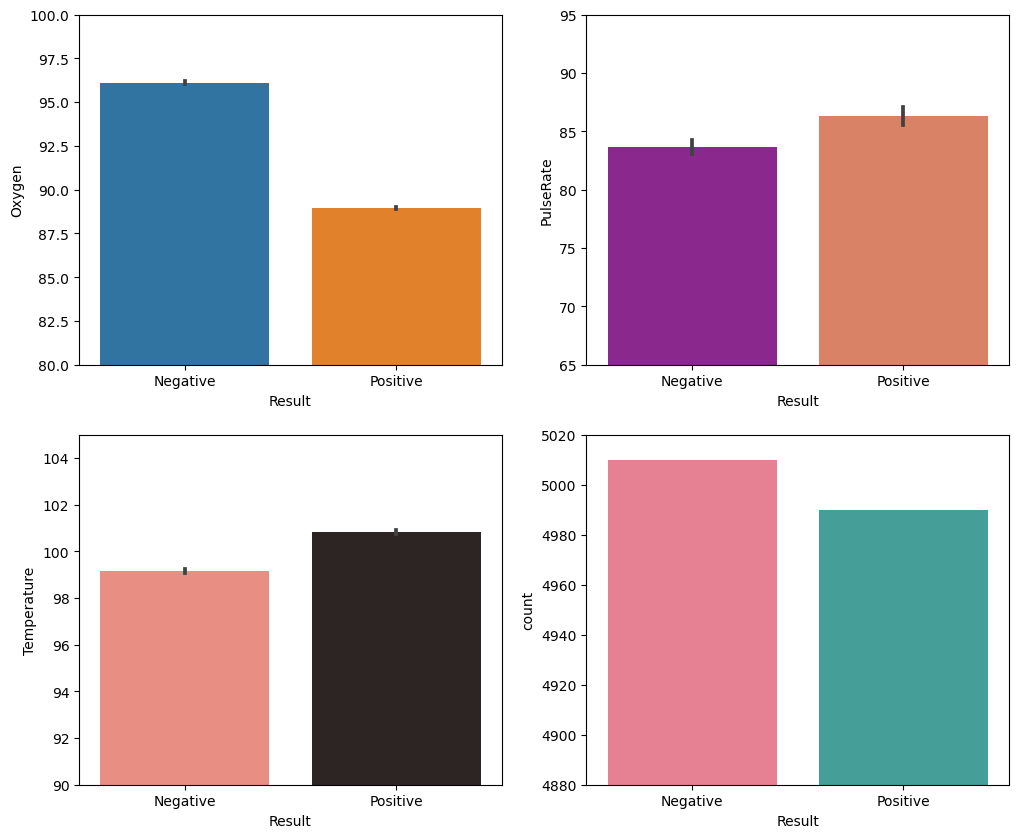

In [4]:
plt.figure(figsize=(60,10))
fig,axes=plt.subplots(2,2,figsize=(12,10))
axes[0,0].set(ylim=(80,100))
sns.barplot(x="Result",y="Oxygen",data=input_df,ax=axes[0,0])
axes[0,1].set(ylim=(65,95))
sns.barplot(x="Result",y="PulseRate",data=input_df,ax=axes[0,1],palette="plasma")
axes[1,0].set(ylim=(90,105))
sns.barplot(x="Result",y="Temperature",data=input_df,ax=axes[1,0],palette="dark:salmon_r")
axes[1,1].set(ylim=(4880,5020))
sns.countplot(x="Result",data=input_df,ax=axes[1,1],palette="husl")

In [5]:
print('Shape:', input_df.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Size:', input_df.size)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Count:')
print(input_df.count())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Count of Result column:')
print(input_df['Result'].value_counts())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')

nan_values = input_df[input_df.isnull().any(axis=1)]
print('NaN (Null) values:')
print (nan_values)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')

input_df.tail()

Shape: (10002, 5)
~~~~~~~~~~~~~~~~~~~~~~~~~~
Size: 50010
~~~~~~~~~~~~~~~~~~~~~~~~~~
Count:
ID             10001
Oxygen         10000
PulseRate      10000
Temperature    10000
Result         10000
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~
Count of Result column:
Negative    5010
Positive    4990
Name: Result, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~
NaN (Null) values:
                                                      ID  Oxygen  PulseRate  \
10000                                                NaN     NaN        NaN   
10001  Covid-19 Temperature, Oxygen & Pulse Rate read...     NaN        NaN   

       Temperature Result  
10000          NaN    NaN  
10001          NaN    NaN  
~~~~~~~~~~~~~~~~~~~~~~~~~~


,ID,Oxygen,PulseRate,Temperature,Result
9997,9997,99.0,56.0,105.0,Negative
9998,9998,92.0,49.0,98.0,Positive
9999,9999,85.0,52.0,99.0,Positive
10000,NaN,NaN,NaN,NaN,NaN
10001,"Covid-19 Temperature, Oxygen & Pulse Rate read...",NaN,NaN,NaN,NaN


In [6]:
#Checking if there are missing values
input_df.isnull().sum()

ID             1
Oxygen         2
PulseRate      2
Temperature    2
Result         2
dtype: int64

In [7]:
input_df = input_df.dropna()
input_df.info()
input_df = input_df.reset_index(drop=True)
#input_df = input_df.set_index('ID')

print('Shape:', input_df.shape)
print('==========================')
print('Size:', input_df.size)
print('==========================')
print('Count:')
print(input_df.count())
print('==========================')
print('Count of Result column:')
print(input_df['Result'].value_counts())
print('==========================')

nan_values = input_df[input_df.isnull().any(axis=1)]
print('NaN (Null) values:')
print (nan_values)
print('==========================')

input_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10000 non-null  object 
 1   Oxygen       10000 non-null  float64
 2   PulseRate    10000 non-null  float64
 3   Temperature  10000 non-null  float64
 4   Result       10000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 468.8+ KB
Shape: (10000, 5)
Size: 50000
Count:
ID             10000
Oxygen         10000
PulseRate      10000
Temperature    10000
Result         10000
dtype: int64
Count of Result column:
Negative    5010
Positive    4990
Name: Result, dtype: int64
NaN (Null) values:
Empty DataFrame
Columns: [ID, Oxygen, PulseRate, Temperature, Result]
Index: []


,ID,Oxygen,PulseRate,Temperature,Result
9995,9995,95.0,124.0,97.0,Negative
9996,9996,88.0,70.0,100.0,Positive
9997,9997,99.0,56.0,105.0,Negative
9998,9998,92.0,49.0,98.0,Positive
9999,9999,85.0,52.0,99.0,Positive


In [8]:
input_df.dtypes

ID              object
Oxygen         float64
PulseRate      float64
Temperature    float64
Result          object
dtype: object

In [9]:
input_df.columns

Index(['ID', 'Oxygen', 'PulseRate', 'Temperature', 'Result'], dtype='object')

In [17]:
features_df = input_df[['Oxygen', 'PulseRate', 'Temperature']]

X = np.asarray(features_df)
y = np.asarray(input_df['Result'])

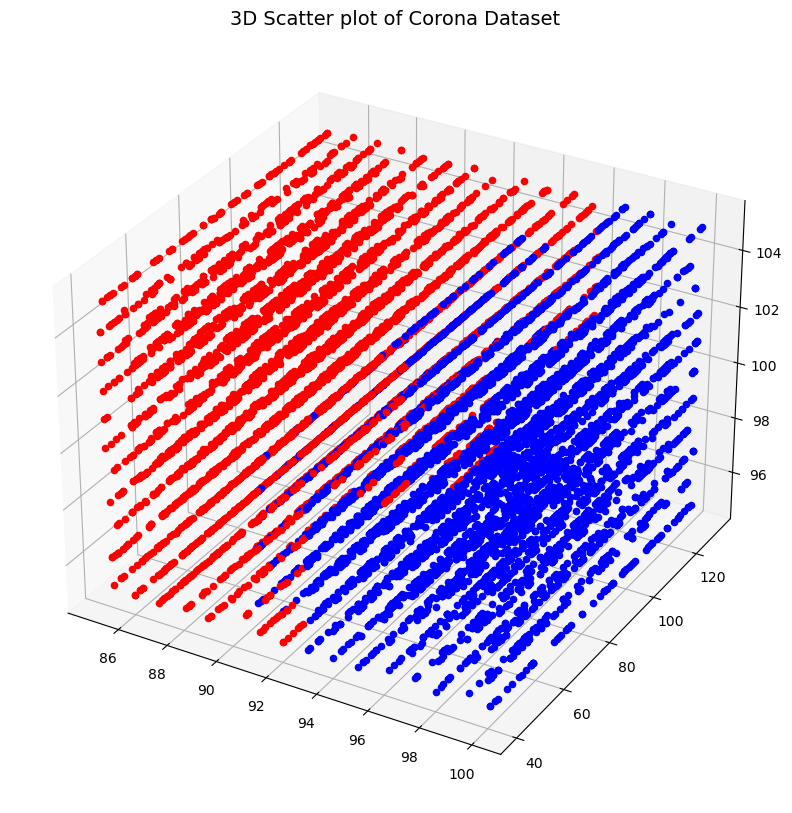

Red --> Corona Positive | Blue --> Corona Negative


In [18]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
x_axis = input_df['Oxygen']
y_axis = input_df['PulseRate']
z_axis = input_df['Temperature']
c = x_axis + y_axis

for i in range(len(y)):
    if y[i] == 'Positive':
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='red')
    else:
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='blue')

# syntax for plotting
ax.set_title('3D Scatter plot of Corona Dataset', fontsize=14)
plt.show()

print('Red --> Corona Positive | Blue --> Corona Negative')

In [19]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_values = [1, 2, 5, 10]

best_accuracy = -1
best_kernal = ''
best_C = -1

for c in c_values:
    print('For C =', c)
    for k in kernels:
        model = svm.SVC(kernel=k, C=c)
        cv_score = cross_val_score(model,X,y,cv=10)
        print('For Kernel:', k)
        print(cv_score)
        print('Accuracy is:', cv_score.mean())
        if cv_score.mean() > best_accuracy:
            best_accuracy = cv_score.mean()
            best_kernal = k
            best_C = c
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

For C = 1
For Kernel: linear
[0.923 0.918 0.932 0.932 0.912 0.926 0.912 0.93  0.916 0.911]
Accuracy is: 0.9212
For Kernel: poly
[0.938 0.944 0.946 0.944 0.93  0.949 0.935 0.946 0.943 0.918]
Accuracy is: 0.9392999999999999
For Kernel: rbf
[0.94  0.945 0.953 0.948 0.934 0.951 0.936 0.945 0.949 0.925]
Accuracy is: 0.9426
For Kernel: sigmoid
[0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501]
Accuracy is: 0.5010000000000001
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For C = 2
For Kernel: linear
[0.923 0.918 0.932 0.932 0.912 0.926 0.912 0.93  0.916 0.911]
Accuracy is: 0.9212
For Kernel: poly
[0.938 0.945 0.946 0.945 0.931 0.95  0.933 0.947 0.942 0.918]
Accuracy is: 0.9395
For Kernel: rbf
[0.942 0.943 0.955 0.949 0.932 0.95  0.939 0.945 0.946 0.927]
Accuracy is: 0.9427999999999999
For Kernel: sigmoid
[0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501]
Accuracy is: 0.5010000000000001
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For C 

In [20]:
print('Best Accuracy:', best_accuracy)
print('For Kernel:', best_kernal, 'and C =', best_C)

Best Accuracy: 0.9436000000000002
For Kernel: rbf and C = 10


In [21]:
#KNN
X=input_df.iloc[:,:3]
y=input_df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train)
print(X_test)

        ID  Oxygen  PulseRate
2967  2967    87.0       70.0
700    700    86.0      103.0
3481  3481    89.0      123.0
1621  1621    93.0       84.0
800    800    85.0       44.0
...    ...     ...        ...
9225  9225    86.0       77.0
4859  4859    92.0       53.0
3264  3264    97.0       73.0
9845  9845    93.0       53.0
2732  2732    92.0       45.0

[7500 rows x 3 columns]
        ID  Oxygen  PulseRate
9394  9394    92.0      119.0
898    898    88.0       85.0
2398  2398    91.0      100.0
5906  5906    99.0       53.0
2343  2343    99.0      128.0
...    ...     ...        ...
8764  8764    85.0       70.0
4359  4359    90.0       64.0
2041  2041    85.0       52.0
1108  1108    90.0       94.0
3332  3332    87.0       86.0

[2500 rows x 3 columns]


In [22]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 62.88
Accuracy with k=3 63.839999999999996


In [25]:
#Eseble Learning 
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X=input_df.iloc[:,:3]
y=input_df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=10)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [26]:
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 1}


In [27]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [28]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [32]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [33]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

knn: 0.6792
rf: 0.86
log_reg: 0.5892


In [36]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
ensemble = VotingClassifier(estimators, voting='hard')

In [37]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

0.788